# Метрики precision и recall

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affair             6366 non-null int64
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [4]:
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
# раньше использовали from sklearn.cross_validation import train_test_split  
from sklearn.model_selection import train_test_split

Формируем набор признаков и целевую переменную

In [5]:
data.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affair'],
      dtype='object')

In [9]:
X = data[['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ', 'occupation', 'occupation_husb']]

In [10]:
Y = data['affair']

In [11]:
model = LogisticRegression()

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc = StandardScaler()

In [16]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Обучаем модель

In [17]:
model = LogisticRegression()
model.fit(X_train, Y_train)

/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Получаем прогнозные значения модели (переменная predictions)

In [18]:
predictions = model.predict_proba(X_test)

In [20]:
predictions

array([[0.37451939, 0.62548061],
       [0.92524458, 0.07475542],
       [0.68439753, 0.31560247],
       ...,
       [0.54096473, 0.45903527],
       [0.79771177, 0.20228823],
       [0.77238964, 0.22761036]])

In [19]:
for line in zip( predictions[:, 1], Y_test ):
    print( line )

(0.6254806057528772, 0)
(0.07475541715180554, 0)
(0.31560246784491247, 0)
(0.2902323616306086, 0)
(0.227610357174956, 1)
(0.2151326719540919, 0)
(0.14898595930579947, 0)
(0.202119632300601, 0)
(0.7453335325215045, 1)
(0.40607229393589217, 0)
(0.12798113283806448, 0)
(0.16223254114539207, 0)
(0.09673829230849235, 0)
(0.27197771735203824, 0)
(0.7132235076084248, 1)
(0.532847678481734, 0)
(0.2838866224486587, 0)
(0.7053150801279637, 1)
(0.3189296932244291, 0)
(0.18718625195457717, 0)
(0.23955462845926914, 1)
(0.4292797357090639, 1)
(0.08103374986958152, 1)
(0.4620215551422113, 1)
(0.15212638470952503, 0)
(0.16479356396496575, 0)
(0.4082840646448684, 0)
(0.33348061961946496, 0)
(0.24763869435342628, 0)
(0.1618908856530154, 0)
(0.1190089834798462, 0)
(0.30197934685779326, 1)
(0.23477425406348032, 0)
(0.4977803087931007, 1)
(0.6483649917108121, 1)
(0.42032466527390777, 1)
(0.18731582678211456, 0)
(0.22138114494151778, 0)
(0.30502990001303604, 1)
(0.1238881430509228, 0)
(0.3458017928645208, 1

(0.1841652692071423, 0)
(0.19531105341578697, 0)
(0.21531829126564214, 1)
(0.08656887349115144, 0)
(0.3141938302583152, 0)
(0.31314424620373704, 0)
(0.567272188196631, 1)
(0.4605286557711782, 1)
(0.7121512853449316, 1)
(0.4260980224865887, 0)
(0.09798691135249359, 0)
(0.1371314985177039, 0)
(0.09226235030175192, 0)
(0.08956622140327246, 0)
(0.7535110516355733, 1)
(0.1316553238590579, 0)
(0.4677238477427833, 1)
(0.3937260432023475, 1)
(0.17415371588532033, 0)
(0.2268069279672186, 1)
(0.5888899335767416, 1)
(0.4187329993917852, 1)
(0.6794788414188403, 0)
(0.699321865322452, 1)
(0.6989580097717853, 0)
(0.5081581667805096, 1)
(0.6732986672038053, 1)
(0.12011139291403891, 1)
(0.20190909174979252, 1)
(0.09067631306035705, 0)
(0.3420344118641231, 1)
(0.16902004392947276, 1)
(0.6207756687550355, 1)
(0.07872692578881668, 0)
(0.792056739912253, 1)
(0.5115380353604451, 0)
(0.20695091664247034, 0)
(0.3513495401390176, 0)
(0.3596806174327901, 0)
(0.3249387301910147, 0)
(0.43562051245145983, 0)
(0.2

In [21]:
model.score(X_test, Y_test)

0.7319371727748691

### Упражнение

Постройте набор моделей для значений random_state от 0 до 9. Получите model.score для каждого варианта.

In [23]:
# будет ли меняться качество с разным random_state

for i in range(10):
    m = LogisticRegression(random_state=i)
    m.fit(X_train, Y_train)
#     print(m.coef_)
    print(m.score(X_test, Y_test))

0.7319371727748691
0.7319371727748691
0.7319371727748691
0.7319371727748691
0.7319371727748691
0.7319371727748691
0.7319371727748691
0.7319371727748691
0.7319371727748691
0.7319371727748691


/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will 

In [25]:
# будет ли меняться качество с одинаковым random_state

for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = i)
    m = LogisticRegression(random_state=0)
    m.fit(X_train, Y_train)
#     print(m.coef_)
    print(m.score(X_test, Y_test)) # качество зависит от разбивки

0.7303664921465969
0.7287958115183246
0.7162303664921466
0.7204188481675393
0.7130890052356021
0.7256544502617801
0.7141361256544503
0.7345549738219895
0.7193717277486911
0.7204188481675393


/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will 

### Оценка качества модели

In [26]:
import warnings
warnings.simplefilter('ignore')

In [29]:
###
# a = [1,2,3]
# b = [4,5,6]

# for pair in zip(a,b):
#     print(pair)
###

Считаем accuracy последней модели

In [30]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [33]:
# какая точность получилась?

accuracy = (tp + tn) / (tp + fp + fn + tn)
accuracy

0.6931937172774869

In [32]:
precision = tp / (tp + fp)
precision

0.5714285714285714

In [36]:
recall = tp / (tp + fn)
recall

# получается что модель практически не ставит 1

0.0068143100511073255

In [ ]:
##

In [38]:
print(Y_test.sum())

587


In [39]:
# вероятности сравниваем с 0.5 (получаем булевый вектор позитивный или негативный класс) 
# и если мы его сложим то увидим сколько модель поставила 1)

(predictions[:, 1] >= 0.5).sum()

# при достаточно большом accuracy (70%) наша модель практически не предсказывает первый класс таргета т.е. 
# предсказательной способности нет. Ловит всего 7 из 587 ;(

7

### Используем готовые библиотеки

In [40]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [49]:
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )

In [44]:
thres.shape

(1701,)

In [42]:
# посмотрим что получилось
for line in zip( pr, re, thres ):
    print( line )

(0.3074908328968046, 1.0, 1.6115346403450528e-08)
(0.30712788259958074, 0.9982964224872232, 4.348879104454256e-08)
(0.30728893550078656, 0.9982964224872232, 5.67121865620895e-08)
(0.3074501573976915, 0.9982964224872232, 6.623234911091514e-08)
(0.30761154855643047, 0.9982964224872232, 8.299723923075018e-08)
(0.3077731092436975, 0.9982964224872232, 9.217155509482957e-08)
(0.30793483972674723, 0.9982964224872232, 9.745739499443649e-08)
(0.30809674027339645, 0.9982964224872232, 1.216461641778556e-07)
(0.30825881115202525, 0.9982964224872232, 1.3640301678383332e-07)
(0.3078947368421053, 0.9965928449744463, 1.3668615087209882e-07)
(0.3080568720379147, 0.9965928449744463, 1.6062446895398952e-07)
(0.3076923076923077, 0.9948892674616695, 1.7283608181899777e-07)
(0.30785450711649975, 0.9948892674616695, 1.920223686292372e-07)
(0.3080168776371308, 0.9948892674616695, 1.994382974813157e-07)
(0.30817941952506595, 0.9948892674616695, 2.155439687019906e-07)
(0.30834213305174235, 0.9948892674616695, 2

(0.5833333333333334, 0.01192504258943782, 0.46416763518292015)
(0.5454545454545454, 0.010221465076660987, 0.471746823633707)
(0.5, 0.008517887563884156, 0.4778214508730869)
(0.4444444444444444, 0.0068143100511073255, 0.4821076086659123)
(0.5, 0.0068143100511073255, 0.4996021230838637)
(0.5714285714285714, 0.0068143100511073255, 0.5308304328513747)
(0.5, 0.005110732538330494, 0.5802429976748854)
(0.4, 0.0034071550255536627, 0.5865314399418283)
(0.5, 0.0034071550255536627, 0.6010054431160207)
(0.6666666666666666, 0.0034071550255536627, 0.603508906655545)
(1.0, 0.0034071550255536627, 0.6553412237530747)
(1.0, 0.0017035775127768314, 0.7911280104702294)


In [45]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


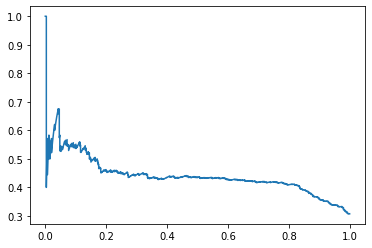

In [50]:
# plt.plot( re, pr )
plt.plot( re, pr )

In [51]:
from sklearn.metrics import average_precision_score

In [52]:
# площадь под кривой
average_precision_score( Y_test, predictions[:, 1] )

0.4418140145865763

### ROC

In [53]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [54]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

In [55]:
for line in zip( fpr, tpr, thres ):
    print( line )

(0.0, 0.0, 1.7911280104702294)
(0.0, 0.0017035775127768314, 0.7911280104702294)
(0.0, 0.0034071550255536627, 0.6553412237530747)
(0.0022675736961451248, 0.0034071550255536627, 0.5865314399418283)
(0.0022675736961451248, 0.0068143100511073255, 0.5308304328513747)
(0.003779289493575208, 0.0068143100511073255, 0.4821076086659123)
(0.003779289493575208, 0.01192504258943782, 0.46416763518292015)
(0.005291005291005291, 0.01192504258943782, 0.4433076452141014)
(0.005291005291005291, 0.015332197614991482, 0.40576935905766537)
(0.006802721088435374, 0.015332197614991482, 0.3902966687237717)
(0.006802721088435374, 0.020442930153321975, 0.31843081331478573)
(0.008314436885865457, 0.020442930153321975, 0.3148569368498732)
(0.008314436885865457, 0.030664395229982964, 0.2804258426146216)
(0.009070294784580499, 0.030664395229982964, 0.27736472257425443)
(0.009070294784580499, 0.04258943781942078, 0.2507567721564801)
(0.009826152683295541, 0.04258943781942078, 0.24415218626499985)
(0.00982615268329554

Text(0.5, 0, 'False Positive Rate')

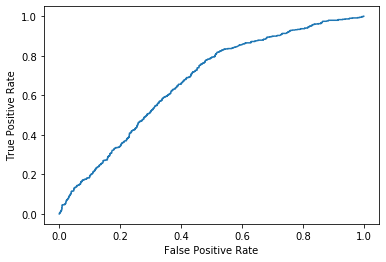

In [58]:
plt.plot( fpr, tpr )
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

**Построим еще одну модель и сравним их между собой**

In [59]:
Xshort = X.loc[ :, ['age', 'children'] ]
Xshort.head()

,age,children
0,32.0,3.0
1,27.0,3.0
2,22.0,0.0
3,37.0,4.0
4,27.0,1.0


In [60]:
model2 = LogisticRegression()

In [61]:
X_train_short, X_test_short, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [62]:
model2.fit( X_train_short, Y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
predictions2 = model2.predict_proba( X_test_short )

In [64]:
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )

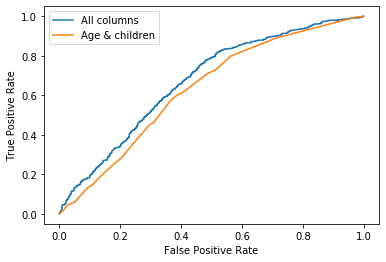

In [65]:
plt.plot( fpr, tpr, label = 'All columns' )
plt.plot( fpr2, tpr2, label = 'Age & children' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Посчитаем площадь под ROC-кривой для двух моделей**

In [66]:
from sklearn.metrics import roc_auc_score

In [67]:
roc_auc_score( Y_test, predictions[:, 1] )

0.5149932799862439

In [68]:
roc_auc_score( Y_test, predictions2[:, 1] )

0.6311452091928271

Можно посчитать с помощью более общего метода auc

Про разницу между ними https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc

In [69]:
from sklearn.metrics import auc

In [70]:
auc( fpr, tpr )

0.6719338502010684

In [71]:
auc( fpr2, tpr2 )

0.6311452091928271

## Пример влияния L1 и L2-регуляризации

In [72]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01 ).fit( X_train, Y_train )
predictions = model1.predict_proba( X_test )

In [73]:
model2 = LogisticRegression( penalty = 'l2', C = 0.01 ).fit( X_train, Y_train )
predictions2 = model2.predict_proba( X_test )

In [74]:
model3 = LogisticRegression( penalty = 'l1', C = 0.001 ).fit( X_train, Y_train )
predictions3 = model3.predict_proba( X_test )

In [75]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

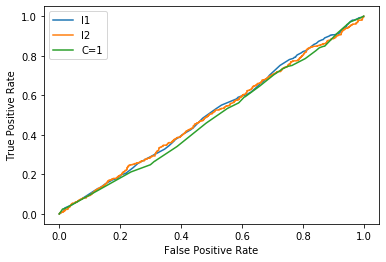

In [76]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Построим еще одну модель, используя другие признаки**

In [77]:
Xshort = pd.get_dummies( data.loc[ :, ['age', 'children'] ], columns = ['age', 'children'] )
Xshort.head()

,age_17.5,age_22.0,age_27.0,age_32.0,age_37.0,age_42.0,children_0.0,children_1.0,children_2.0,children_3.0,children_4.0,children_5.5
0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,0


In [78]:
Y = data['affair']

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [80]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01 ).fit( X_train, Y_train )
model2 = LogisticRegression( penalty = 'l2', C = 0.01 ).fit( X_train, Y_train )
model3 = LogisticRegression( penalty = 'l2', C = 1 ).fit( X_train, Y_train )

In [81]:
predictions = model1.predict_proba( X_test )
predictions2 = model2.predict_proba( X_test )
predictions3 = model3.predict_proba( X_test )

In [82]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

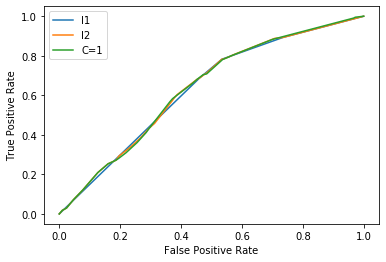

In [83]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()